In [14]:
import math
import os.path
import pandas as pd
import json
from random import shuffle
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
print (os.getcwd())
dados=pd.read_csv('AB_NYC_2019.csv')
dados=dados[dados.room_type=='Entire home/apt']
dados=dados.loc[(dados.minimum_nights<30)]
dados=dados.loc[(dados.calculated_host_listings_count<10)]
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results
y=dados['price']
x=dados[['latitude','longitude']]
regressao=regress(x,y)
c=regressao.params['const']
lat=regressao.params['latitude']
long=regressao.params['longitude']
def f(latitude,longitude):
    return c + lat*latitude + long*longitude
npoints=100
latitude= np.linspace(x['latitude'].min(), x['latitude'].max(), npoints)
longitude= np.linspace(x['longitude'].min(), x['longitude'].max(), npoints)
latitude_x , longitude_y = np.meshgrid(latitude,longitude)
s = f(latitude_x,longitude_y)

/Users/Kabbani/Desktop/Insper/Ciência dos Dados/P3-CD-AA-BK-GB-GK


<IPython.core.display.Javascript object>


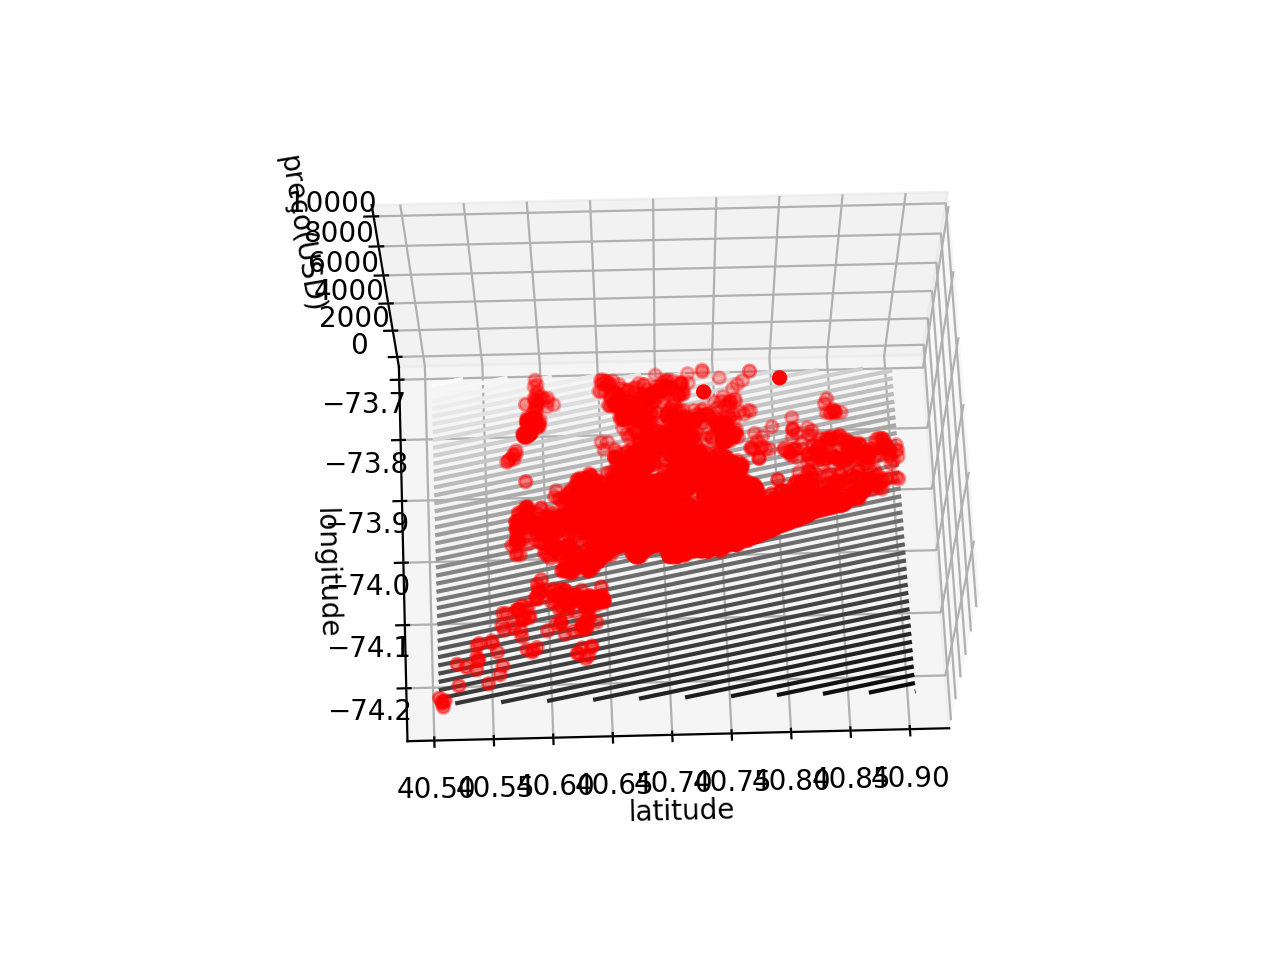

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['latitude'],x['longitude'],y,c='r',marker='o')
ax.contour3D(latitude_x,longitude_y,s,50,cmap='binary')
ax.view_init(30,-142)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('preço(USD)')
plt.show()